# Multiple linear Regression Model (MLRM)

### import basic libraries

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### importing dataset and creating MOF and DVV

In [99]:
data=pd.read_csv("50_Startups.csv")

# creating matrix of features and dependent variable vector
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [100]:
# printing matrix of feature
pd.DataFrame(x)

,0,1,2,3
0,165349.2,136897.8,471784.1,New York
1,162597.7,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.9,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [101]:
# printing dependent variable vector
# pd.DataFrame(y)

### encoding state column with oneHotEncoder

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# now creating object for the column transformer 
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder="passthrough")

# now fit and transform the 3 column
x=ct.fit_transform(x)

In [103]:
pd.DataFrame(x)
# print(type(x))

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.2,136897.8,471784.1
1,1.0,0.0,0.0,162597.7,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.9,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


### Splitting dataset

In [104]:
# we are going to use test-train-split function to split database in 80-20

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=.2)



In [105]:
print(xtrain)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

###  Building model

In [106]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

# fit the model and build it 
lr.fit(xtrain,ytrain)

LinearRegression()

In [107]:
# now check predictions of model 
ypredicted=lr.predict(xtest)

In [108]:
print(ypredicted)

[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]


In [109]:
print(ytest)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [110]:
# lets round up our predicted array 
np.set_printoptions(precision=2)
ypredicted

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [111]:
print(len(ytrain))

40


### Graphical overview of model

In [120]:
# sidewise view
m=pd.DataFrame()

# np.set_printoptions(precision=2)
m.insert(column="original",value=ytest,loc=0)
m.insert(column="predicted",value=ypredicted,loc=1)

# round up ypredicted column 
m["predicted"]=m["predicted"].round(2)
m

,original,predicted
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


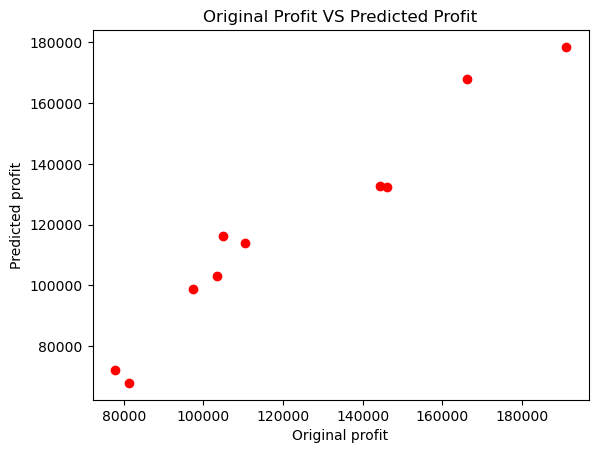

In [113]:
plt.scatter(ytest,ypredicted,color="red")
plt.xlabel("Original profit")
plt.ylabel("Predicted profit")
plt.title("Original Profit VS Predicted Profit")
plt.show()
# plt.plot(xtrain,lr.predict(xtrain),color="black")

### Exporting results

In [ ]:
m.to_csv("output.csv",index=0)